In [2]:
# You can add the parent directory to PYTHONPATH, in order to achieve that, 
# you can use OS depending path in the "module search path" which is listed 
# in sys.path. So you can easily add the parent directory like following:
import sys
import context

%matplotlib inline

import projpkg as pp
from projpkg.gcd import get_housing_data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo para gráficos igual al de ggplot en R
plt.style.use('ggplot')

__file__: c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\py_pkg\PYTHON\projpkg
Everything OK. PY_HOME: c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\py_pkg


## Obtener los datos

In [ ]:
housing_data = pp.gcd.get_housing_data()
housing_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pt_ratio,bks,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Exploración y Preparación de los datos

In [ ]:
housing_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pt_ratio,bks,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crim      506 non-null    float64
 1   zn        506 non-null    float64
 2   indus     506 non-null    float64
 3   chas      506 non-null    int64  
 4   nox       506 non-null    float64
 5   rm        506 non-null    float64
 6   age       506 non-null    float64
 7   dis       506 non-null    float64
 8   rad       506 non-null    int64  
 9   tax       506 non-null    float64
 10  pt_ratio  506 non-null    float64
 11  bks       506 non-null    float64
 12  lstat     506 non-null    float64
 13  medv      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<Figure size 936x936 with 0 Axes>

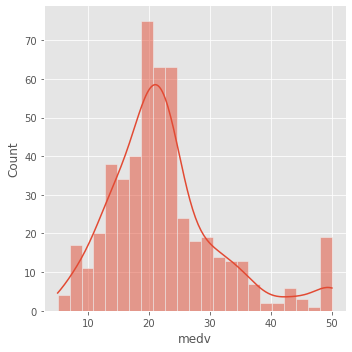

In [ ]:
plt.figure(figsize=(13, 13))

sns.displot(housing_data['medv'], kde = True)
plt.show()

In [ ]:
housing_data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pt_ratio,bks,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

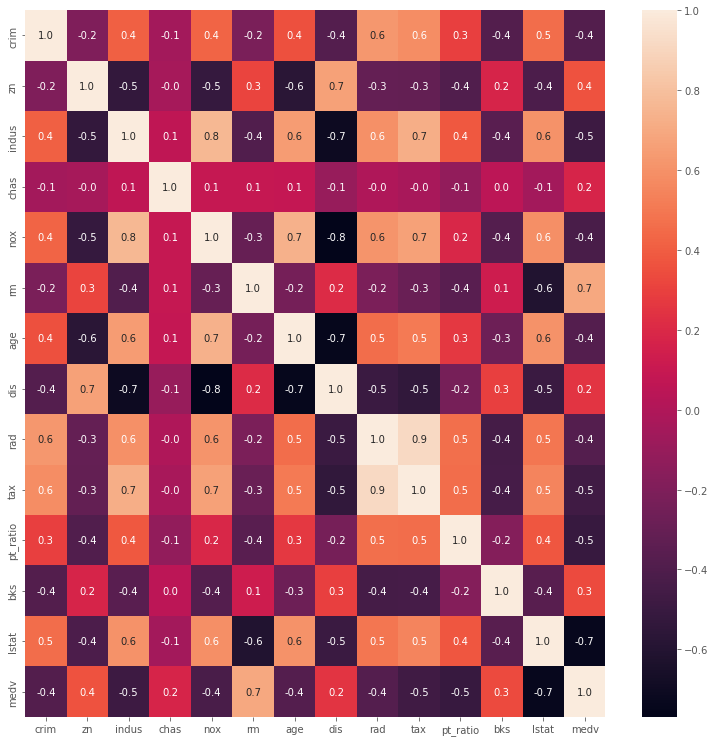

In [ ]:
correlations = housing_data.corr()

plt.figure(figsize=(13, 13))
sns.heatmap(correlations, annot=True, fmt=".1f")


## Primera regresión

In [ ]:
import statsmodels.api as sm

x = housing_data.drop('medv', axis = 1) # Predictores
y = housing_data['medv']                # Etiquetas

X = sm.add_constant(x)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 04 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        20:51:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [ ]:
res.params

const       36.459488
crim        -0.108011
zn           0.046420
indus        0.020559
chas         2.686734
nox        -17.766611
rm           3.809865
age          0.000692
dis         -1.475567
rad          0.306049
tax         -0.012335
pt_ratio    -0.952747
bks          0.009312
lstat       -0.524758
dtype: float64

Text(0, 0.5, 'Prediction')

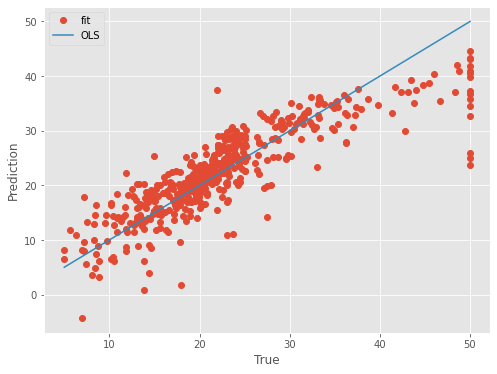

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prestd, iv_l, iv_h = wls_prediction_std(res)

fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(y, res.fittedvalues, 'o', label = 'fit')

x_line = np.linspace(y.min(), y.max(), 100)
y_line = x_line

ax.plot(x_line, y_line, label = "OLS")

ax.legend(loc = 'best')
ax.set_xlabel('True')
ax.set_ylabel('Prediction')

Text(0.5, 1.0, 'Residuals Plot')

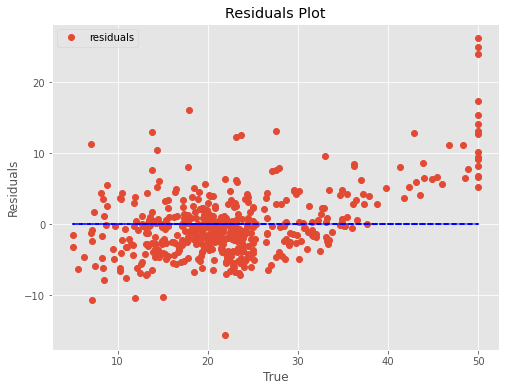

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(y, res.resid, 'o', label = 'residuals')

x_line = np.linspace(y.min(), y.max(), 100)
y_line = 0 * x_line

ax.plot(y, np.zeros(y.shape), 'b--')

ax.legend(loc = 'best')
ax.set_xlabel('True')
ax.set_ylabel('Residuals')
ax.set_title('Residuals Plot')